**21BDS0065**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Hitters.csv"
data = pd.read_csv(data_url)

In [7]:
print("First 10 rows of the dataset :")
print(data.head(10))

First 10 rows of the dataset :
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   
6    185    37      1    23    8     21      2     214     42       1     30   
7    298    73      0    24   24      7      3     509    108       0     41   
8    323    81      6    26   32      8      2     341     86       6     32   
9    401    92     17    49   66     65     13    5206   1332     253    784   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29   

In [8]:
print ("\nChecking for missing values: ")
print(data.isna().sum())


Checking for missing values: 
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [9]:
total_na = data.isna().sum().sum()
print(f"\nTotal number of missing values: {total_na}")


Total number of missing values: 59


In [10]:
columns_of_interest = ["AtBat","Hits","HmRun","Runs","RBI"]
complete_values = data[columns_of_interest].notna().sum()
print("\nTotal complete values per column:")
print(complete_values)


Total complete values per column:
AtBat    322
Hits     322
HmRun    322
Runs     322
RBI      322
dtype: int64


In [13]:
missing_proportion = data.isna().sum() / len(data) * 100
print("\nMissing values proportion per column:")
print(missing_proportion)


Missing values proportion per column:
AtBat         0.000000
Hits          0.000000
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         0.000000
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.000000
CRuns         0.000000
CRBI          0.000000
CWalks        0.000000
League        0.000000
Division      0.000000
PutOuts       0.000000
Assists       0.000000
Errors        0.000000
Salary       18.322981
NewLeague     0.000000
dtype: float64


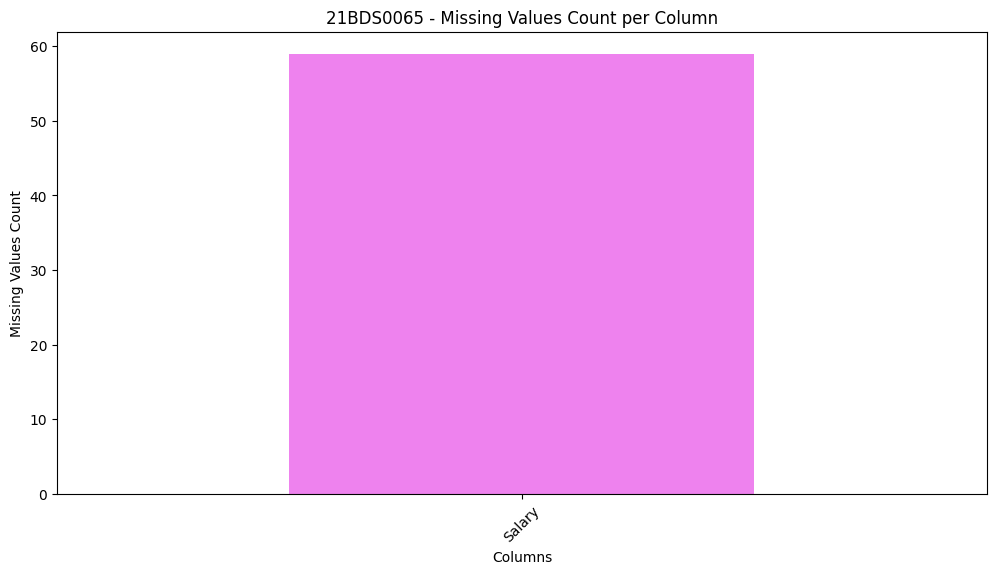

In [14]:
plt.figure(figsize=(12, 6))
missing_counts = data.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar', color = 'violet')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('21BDS0065 - Missing Values Count per Column')
plt.xticks(rotation=45)
plt.show()

In [16]:
data_cleaned = data.dropna()
print("\nAfter row-wise deletion:")
print(data_cleaned.head(10))


After row-wise deletion:
    AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1     315    81      7    24   38     39     14    3449    835      69    321   
2     479   130     18    66   72     76      3    1624    457      63    224   
3     496   141     20    65   78     37     11    5628   1575     225    828   
4     321    87     10    39   42     30      2     396    101      12     48   
5     594   169      4    74   51     35     11    4408   1133      19    501   
6     185    37      1    23    8     21      2     214     42       1     30   
7     298    73      0    24   24      7      3     509    108       0     41   
8     323    81      6    26   32      8      2     341     86       6     32   
9     401    92     17    49   66     65     13    5206   1332     253    784   
10    574   159     21   107   75     59     10    4631   1300      90    702   

    CRBI  CWalks League Division  PutOuts  Assists  Errors    Salary NewLeague  
1

In [ ]:
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col], _ = pd.factorize(data_cleaned[col])

In [18]:
print("\nStatistical Summary:")
print(data_cleaned.describe().T)
stats = data_cleaned.describe().T
stats["median"] = data_cleaned.median()
stats["std"] = data_cleaned.std()
stats["min"] = data_cleaned.min()
stats["max"] = data_cleaned.max()
stats["quantiles"] = data_cleaned.quantile([0.25, 0.5, 0.75]).T.values.tolist()

print("\nExtended Statistical Summary:")
print(stats)


Statistical summary:
           count         mean          std   min    25%     50%     75%  \
AtBat      263.0   403.642586   147.307209  19.0  282.5   413.0   526.0   
Hits       263.0   107.828897    45.125326   1.0   71.5   103.0   141.5   
HmRun      263.0    11.619772     8.757108   0.0    5.0     9.0    18.0   
Runs       263.0    54.745247    25.539816   0.0   33.5    52.0    73.0   
RBI        263.0    51.486692    25.882714   0.0   30.0    47.0    71.0   
Walks      263.0    41.114068    21.718056   0.0   23.0    37.0    57.0   
Years      263.0     7.311787     4.793616   1.0    4.0     6.0    10.0   
CAtBat     263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5   
CHits      263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   
CHmRun     263.0    69.239544    82.197581   0.0   15.0    40.0    92.5   
CRuns      263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   
CRBI       263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   
CWa

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Hitters.csv"
data = pd.read_csv(data_url)

In [21]:

print("Dataset Shape:", data.shape)



Dataset Shape: (322, 20)


In [22]:
print("Column Names:", data.columns.tolist())

Column Names: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague']


In [23]:
print("First 10 rows of the dataset:")
print(data.head(10))

print("\nLast 10 rows of the dataset:")
print(data.tail(10))

First 10 rows of the dataset:
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   
6    185    37      1    23    8     21      2     214     42       1     30   
7    298    73      0    24   24      7      3     509    108       0     41   
8    323    81      6    26   32      8      2     341     86       6     32   
9    401    92     17    49   66     65     13    5206   1332     253    784   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29    

In [24]:
data.drop(columns = ['RBI'], inplace = True)
print("Column 'RBI' deleted.")

Column 'RBI' deleted.


In [25]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
            AtBat        Hits       HmRun        Runs       Walks       Years  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   38.742236    7.444099   
std    153.404981   46.454741    8.709037   26.024095   21.639327    4.926087   
min     16.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%    255.250000   64.000000    4.000000   30.250000   22.000000    4.000000   
50%    379.500000   96.000000    8.000000   48.000000   35.000000    6.000000   
75%    512.000000  137.000000   16.000000   69.000000   53.000000   11.000000   
max    687.000000  238.000000   40.000000  130.000000  105.000000   24.000000   

            CAtBat        CHits      CHmRun        CRuns         CRBI  \
count    322.00000   322.000000  322.000000   322.000000   322.000000   
mean    2648.68323   717.571429   69.490683   358.795031   330.118012   
std     2324.20587   654.472627

In [35]:
columns_to_check = ['AtBat', 'Hits']
non_numeric_counts = data[columns_to_check].applymap(lambda y: not isinstance(y, (int, float))).sum()
print("\nNon-numeric values in specified columns:")
print(non_numeric_counts)


Non-numeric values in specified columns:
AtBat    0
Hits     0
dtype: int64


<ipython-input-35-43c0f9a149f5>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_counts = data[columns_to_check].applymap(lambda y: not isinstance(y, (int, float))).sum()


In [38]:
print("Central Tendency of Hits:")
print("Mean :",data['Hits'].mean())
print("Median : ",data['Hits'].median())
print("Mode : ",data['Hits'].mode()[0])

Central Tendency of Hits:
Mean : 101.0248447204969
Median :  96.0
Mode :  53


In [39]:
print("Dispersion of Hits:")
print("Variance : ",data['Hits'].var())
print("Standard Deviation : ",data['Hits'].std())

Dispersion of Hits:
Variance :  2158.042994524099
Standard Deviation :  46.45474135676679


In [41]:
a1 = data['Hits'].quantile(0.25)
a2 = data['Hits'].quantile(0.50)
a3 = data['Hits'].quantile(0.75)
a4 = data['Hits'].quantile(1.00)
iqr = a3 - a1
print("\nQuartiles and IQR for Hits:")
print("A1:", a1,"\n", "A2:", a2,"\n", "A3:", a3,"\n", "A4:", a4, "\nIQR:", iqr)


Quartiles and IQR for Hits:
A1: 64.0 
 A2: 96.0 
 A3: 137.0 
 A4: 238.0 
IQR: 73.0


In [42]:
print("Correlation between Hits and AtBat:")
print(data['Hits'].corr(data['AtBat']))

Correlation between Hits and AtBat:
0.9679388224132534


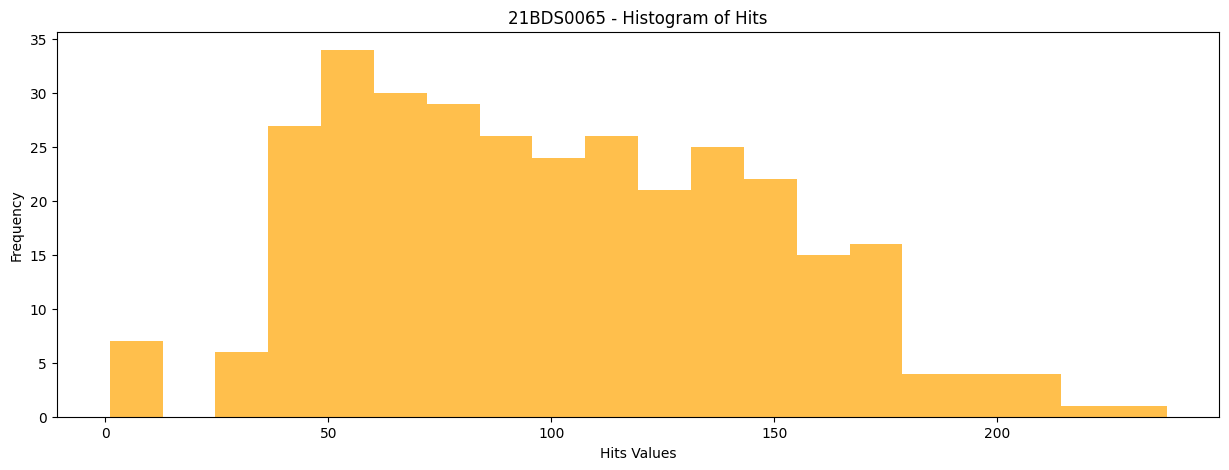

In [43]:
plt.figure(figsize=(15, 5))
plt.hist(data['Hits'], bins=20, color='orange', alpha=0.7)
plt.title("21BDS0065 - Histogram of Hits")
plt.xlabel("Hits Values")
plt.ylabel("Frequency")
plt.show()

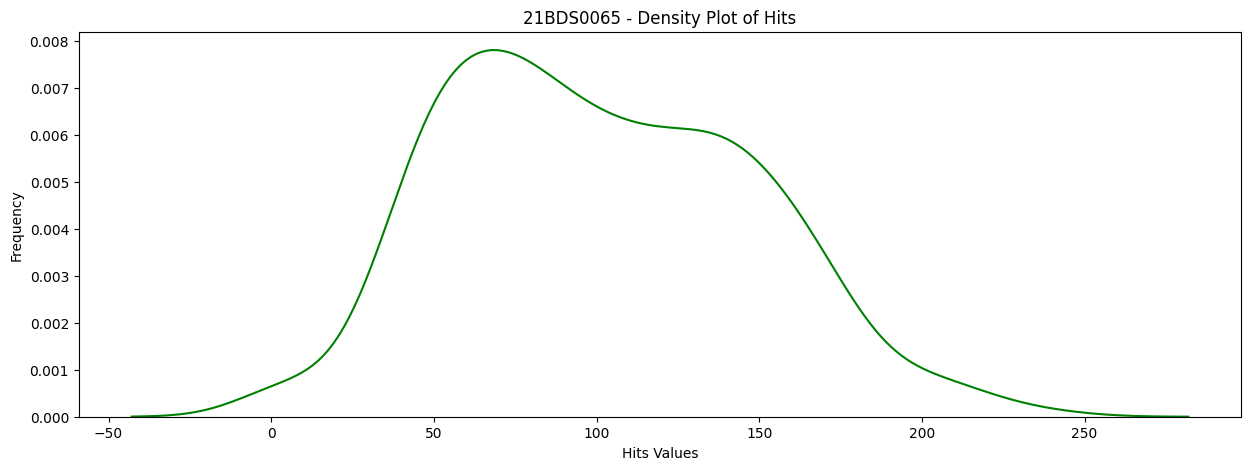

In [46]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data['Hits'], color='green')
plt.title("21BDS0065 - Density Plot of Hits")
plt.xlabel("Hits Values")
plt.ylabel("Frequency")
plt.show()

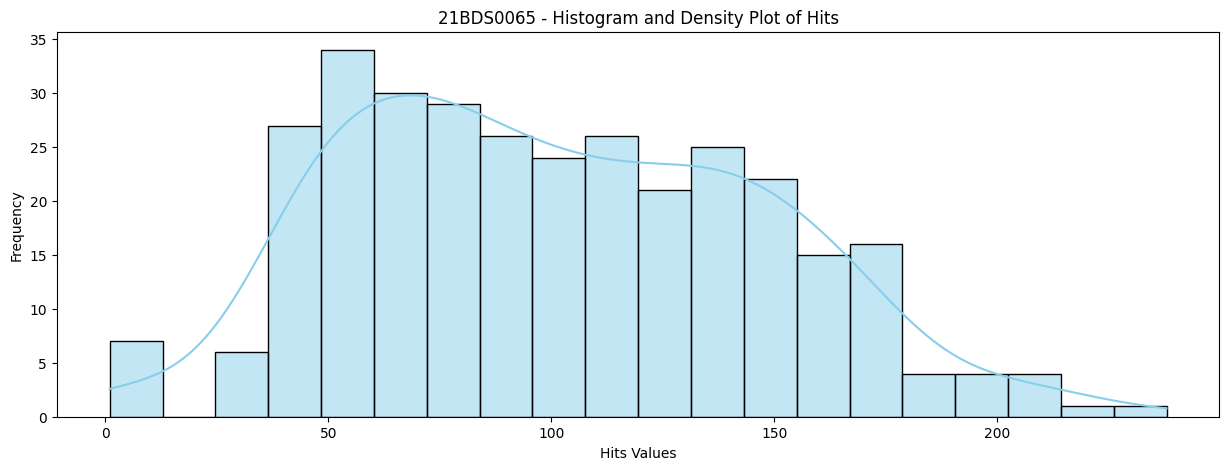

In [48]:
plt.figure(figsize=(15, 5))
sns.histplot(data['Hits'], kde=True, bins=20, color='skyblue')
plt.title("21BDS0065 - Histogram and Density Plot of Hits")
plt.xlabel("Hits Values")
plt.ylabel("Frequency")
plt.show()

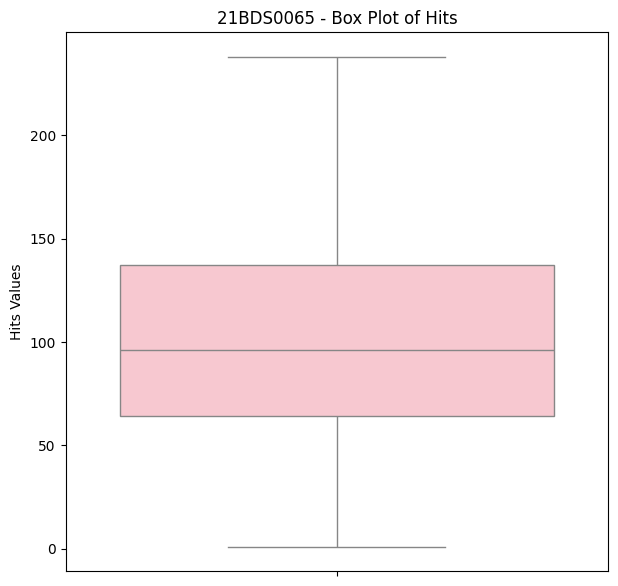

In [50]:
plt.figure(figsize=(7, 7))
sns.boxplot(y=data['Hits'], color='pink')
plt.title("21BDS0065 - Box Plot of Hits")
plt.ylabel("Hits Values")
plt.show()

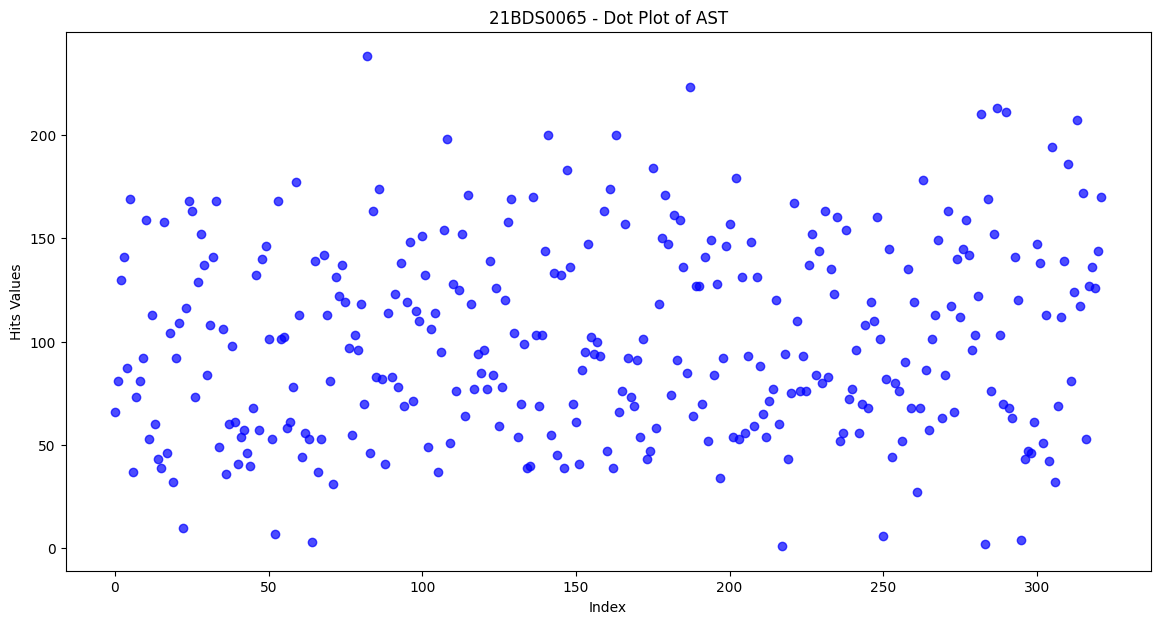

In [56]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Hits'], 'bo', alpha=0.7)
plt.title("21BDS0065 - Dot Plot of AST")
plt.xlabel("Index")
plt.ylabel("Hits Values")
plt.show()

In [57]:
cont_table = pd.crosstab(data['AtBat'], data['Hits'])
print("Contingency Table:")
print(cont_table)

Contingency Table:
Hits   1    2    3    4    6    7    10   27   31   32   ...  186  194  198  \
AtBat                                                    ...                  
16       0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
19       0    0    0    1    0    1    0    0    0    0  ...    0    0    0   
20       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
22       0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
24       0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
642      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
663      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
677      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
680      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
687      0    0    0    0    0   

In [59]:
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("First few rows:\n", data.head())

Dataset Shape: (322, 19)
Dataset Columns: Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'Walks', 'Years', 'CAtBat', 'CHits',
       'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts',
       'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
First few rows:
    AtBat  Hits  HmRun  Runs  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  \
0    293    66      1    30     14      1     293     66       1     30    29   
1    315    81      7    24     39     14    3449    835      69    321   414   
2    479   130     18    66     76      3    1624    457      63    224   266   
3    496   141     20    65     37     11    5628   1575     225    828   838   
4    321    87     10    39     30      2     396    101      12     48    46   

   CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0      14      A        E      446       33      20     NaN         A  
1     375      N        W      632       43      10   475.0         N  
2     263

In [60]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 AtBat         0
Hits          0
HmRun         0
Runs          0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [66]:
if 'Years' in data.columns:
    print("Starting Year:", data['Years'].min())
    print("Ending Year:", data['Years'].max())


Starting Year: 1
Ending Year: 24


In [67]:
if 'Years' in data.columns:
    print("Frequency:", data['Years'].value_counts())

Frequency: Years
4     36
5     30
6     30
3     29
2     25
1     22
7     21
8     16
9     15
10    14
12    14
14    13
13    12
11    10
15     9
18     7
17     7
16     7
20     2
24     1
23     1
19     1
Name: count, dtype: int64


In [68]:
print("Summary:\n", data.describe())

Summary:
             AtBat        Hits       HmRun        Runs       Walks       Years  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   38.742236    7.444099   
std    153.404981   46.454741    8.709037   26.024095   21.639327    4.926087   
min     16.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%    255.250000   64.000000    4.000000   30.250000   22.000000    4.000000   
50%    379.500000   96.000000    8.000000   48.000000   35.000000    6.000000   
75%    512.000000  137.000000   16.000000   69.000000   53.000000   11.000000   
max    687.000000  238.000000   40.000000  130.000000  105.000000   24.000000   

            CAtBat        CHits      CHmRun        CRuns         CRBI  \
count    322.00000   322.000000  322.000000   322.000000   322.000000   
mean    2648.68323   717.571429   69.490683   358.795031   330.118012   
std     2324.20587   654.472627   86.2660

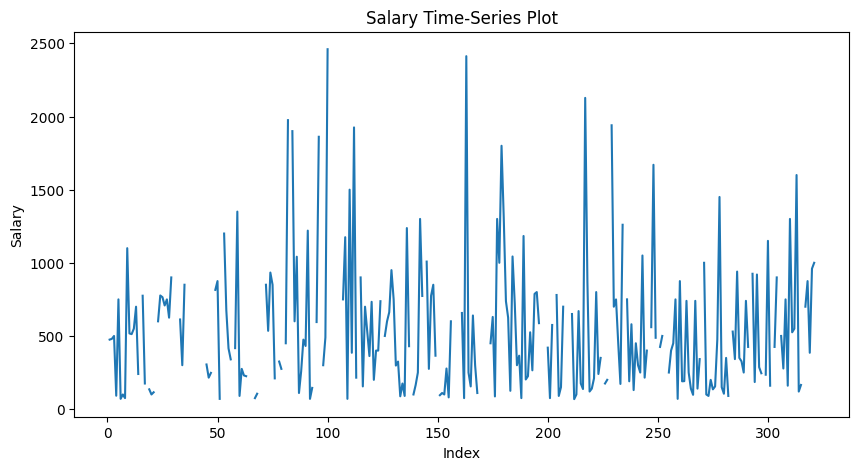

In [69]:
if 'Salary' in data.columns:
    plt.figure(figsize=(10,5))
    plt.plot(data['Salary'])
    plt.title("Salary Time-Series Plot")
    plt.xlabel("Index")
    plt.ylabel("Salary")
    plt.show()

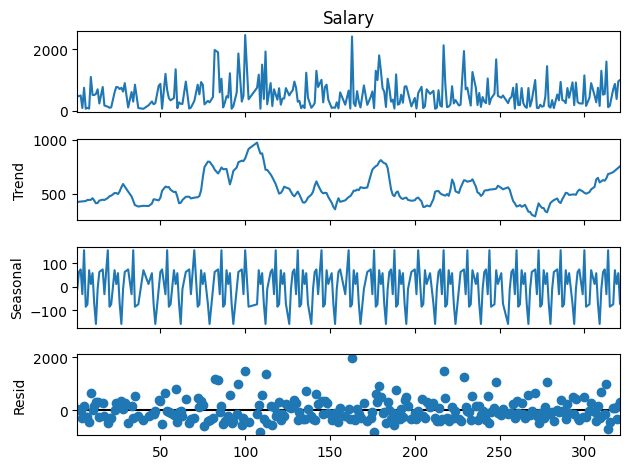

In [75]:
if 'Salary' in data.columns:
    data.dropna(subset=['Salary'], inplace=True)
    decomposition = sm.tsa.seasonal_decompose(data['Salary'], period=12, model='additive', extrapolate_trend='freq')
    decomposition.plot()
    plt.show()

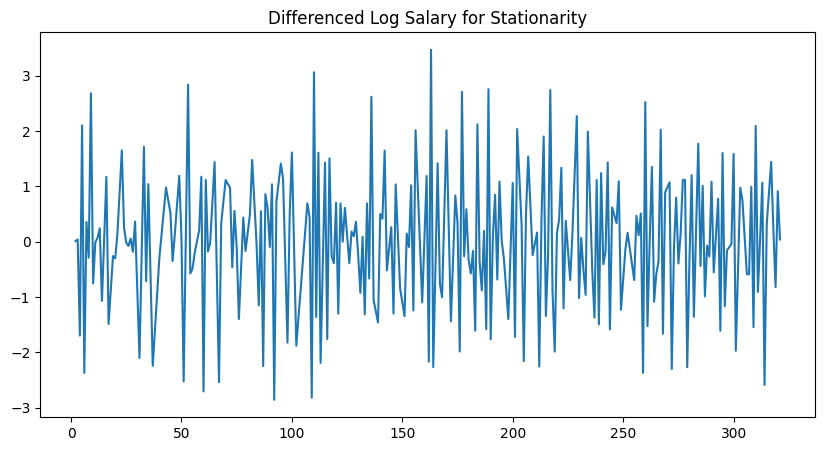

In [76]:
if 'Salary' in data.columns:
    log_salary = np.log(data['Salary'])
    diff_log_salary = log_salary.diff().dropna()

    plt.figure(figsize=(10, 5))
    plt.plot(diff_log_salary)
    plt.title("Differenced Log Salary for Stationarity")
    plt.show()

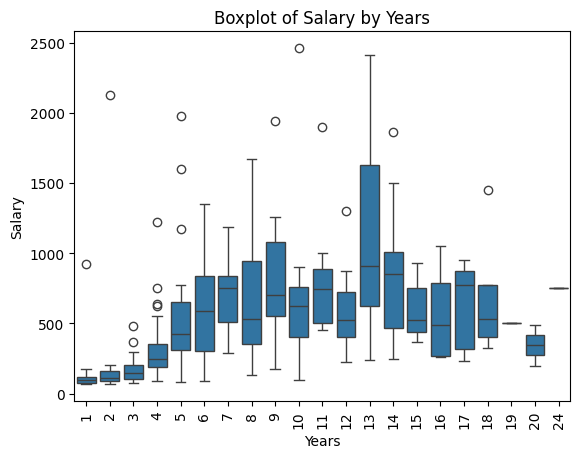

In [78]:
if 'Years' in data.columns:
    data['Years'] = pd.Categorical(data['Years'])
    sns.boxplot(x='Years', y='Salary', data=data)
    plt.xticks(rotation=90)
    plt.title("Boxplot of Salary by Years")
    plt.show()